In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cleantext import clean
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import funcoes_uteis as util

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

In [3]:
df_articles = pd.read_csv('RawArticles.csv', sep='\t', encoding = "UTF-16")

In [4]:
df_articles['categories'] = df_articles['Url'].str.extract('https:\/\/[\w\.]+\/([a-z\-]+)')[0]

In [5]:
df_articles['categories'].sort_values().unique().tolist()





['abbvie-artrite-idiopatica-juvenil',
 'about-we-charity',
 'abramge',
 'adidas',
 'afp',
 'alpargatas',
 'amazon-prime-day',
 'amazonia-importa',
 'amazonia-sob-bolsonaro',
 'ambiente',
 'amp',
 'amstel',
 'articles',
 'asmais',
 'astrazeneca',
 'astrologia',
 'autores',
 'avaliacao-de-governo',
 'banco-de-dados',
 'banco-do-nordeste',
 'bares',
 'bares-e-noite',
 'bat',
 'bayer-hemofilia',
 'bichos',
 'biogen',
 'blogs',
 'bradesco-saude',
 'bradescoseguros',
 'brastemp',
 'brincadeiras',
 'brown-forman',
 'buser',
 'c',
 'caminhos-proibidos',
 'cannabis-green-hub',
 'canoagemslalom',
 'carreiras',
 'ccr',
 'celebridades',
 'centrao',
 'cidadesinteligentes',
 'cielo',
 'ciencia',
 'cinema',
 'cinema-e-series',
 'clara',
 'cni-plano-de-reindustrializacao',
 'cni-sustentabilidade',
 'cnt',
 'colaborador',
 'colgate',
 'colunas',
 'colunistas',
 'comentarios',
 'comida',
 'compartilhar',
 'comunicacao',
 'content',
 'contrabando-no-brasil',
 'cotidiano',
 'crianca',
 'crise-do-clima-nos

In [6]:
df_articles = df_articles.drop('Id', axis=1)

In [7]:
df_articles['Content'] = [txt for txt in df_articles.Content.replace('ic_save', '', regex=True) \
                                                            .replace('ic_share', '', regex=True) \
                                                            .replace('Leia Mais', '', regex=True) \
                                                            .replace('TwitterTwitterÍcone', '', regex=True) \
                                                            .replace('messengerMessengerÍcone', '', regex=True) \
                                                            .replace('LinkedinLinkedinÍcone', '', regex=True) \
                                                            .replace('envelopeE-mailÍcone', '', regex=True) \
                                                            .replace('linkCadeado', '', regex=True) \
                                                            .replace('linkCopiar', '', regex=True) \
                                                            .replace('linkÍcone fechar', '', regex=True) \
                                                            .replace('&nbsp;', ' ', regex=True) \
                                                            .replace('FacebookFacebookÍcone', ' ', regex=True) \
                                                            .replace('WhatsappWhatsappÍcone', ' ', regex=True) \
                                                            .replace('CompartilheÍcone', ' ', regex=True) \
                                                            .replace('Voltar Voltar', ' ', regex=True) \
                                                            .replace('Mais Ícone', ' ', regex=True) \
                                                            .replace('Link Copiar', ' ', regex=True) \
                                                            .replace('Leia Mais', ' ', regex=True) \
                                                            .replace('Ícone fecharVoltarVer', ' ', regex=True) \
                                                            .replace('fecharVoltarVer', ' ', regex=True) \
                                                            .replace('não', ' ', regex=True) \
                                                            .replace('diz', ' ', regex=True) \
                                                            .replace('disse', ' ', regex=True) \
                                                            .replace('também', ' ', regex=True) \
                                                            ]
                                                            


In [8]:
# df_articles.to_csv('FolhaArticles.csv', sep='\t', encoding='utf-8', index=False)

In [9]:

df_articles = df_articles[df_articles['categories'].isin([ 'celebridades'
                                                            , 'ciencia'
                                                            , 'cinema'
                                                            , 'comida'
                                                            , 'educacao'
                                                            , 'eleicoes'
                                                            , 'esporte'
                                                            , 'mercado'
                                                            , 'poder'])].sample(10000)


In [10]:
def gerar_cloud(text):
    if isinstance(text, list):
        text = ' '.join(text)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
from pandas import DataFrame


def gerar_cloud_com_titul(df: DataFrame, category: str) -> None:
    print(category)
    gerar_cloud(df[df['categories'] == category].text.str.cat())

In [12]:

def clean_text(text):

    return clean(text,
                    fix_unicode=True,              
                    to_ascii=True,                 
                    lower=True,                    
                    no_line_breaks=False,
                    no_urls=True,
                    no_emails=False,     
                    no_phone_numbers=False,
                    no_numbers=True,      
                    no_digits=True,       
                    no_currency_symbols=False, 
                    no_punct=True,          
                    replace_with_punct="",
                    replace_with_url="",
                    replace_with_email="",
                    replace_with_phone_number="",
                    replace_with_number="",
                    replace_with_digit="",
                    replace_with_currency_symbol="",
                    lang="pt-br"
                )



In [13]:
df_articles['text'] = [util.remover_stopwords(clean_text(txt)) for txt in df_articles.Content]

celebridades


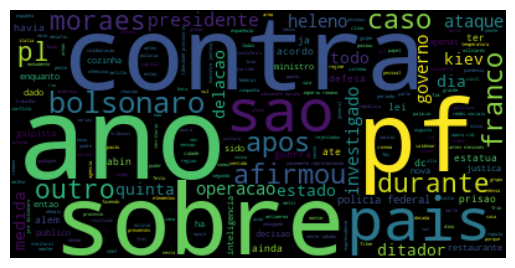

ciencia


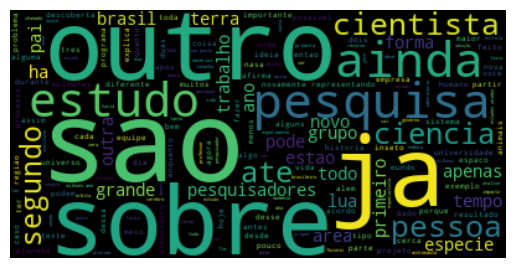

cinema


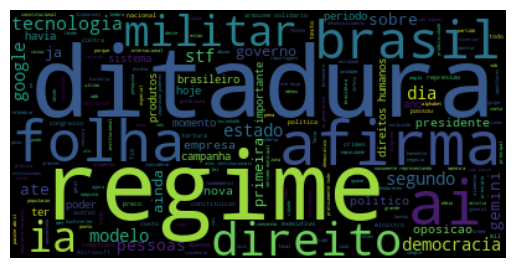

comida


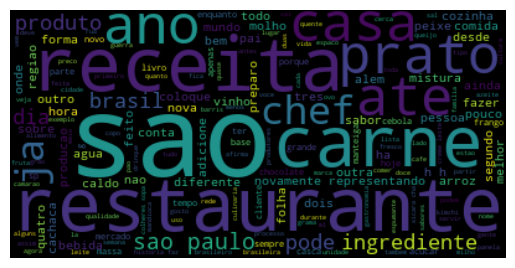

educacao


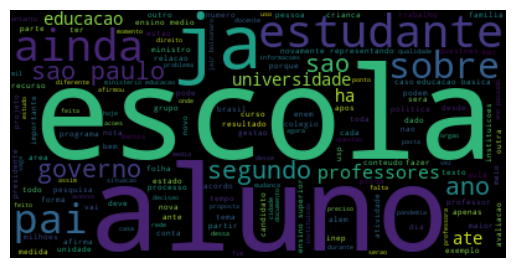

eleicoes


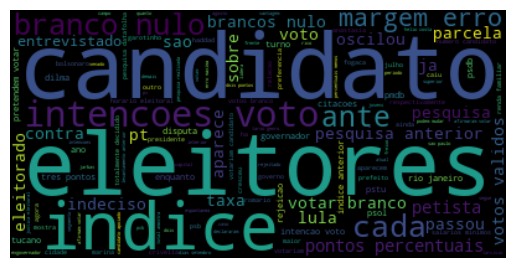

esporte


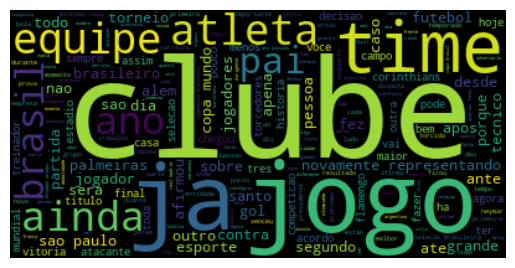

mercado


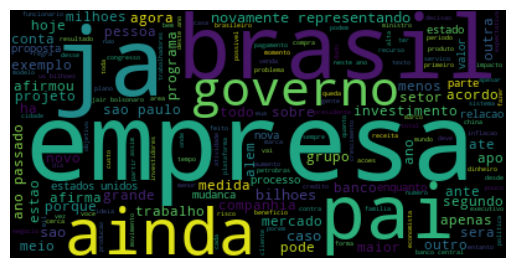

poder


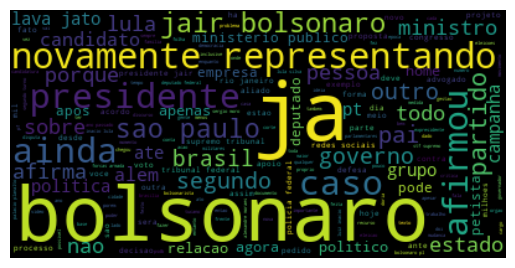

In [14]:
gerar_cloud_com_titul(df_articles, 'celebridades')
gerar_cloud_com_titul(df_articles, 'ciencia')
gerar_cloud_com_titul(df_articles, 'cinema')
gerar_cloud_com_titul(df_articles, 'comida')
gerar_cloud_com_titul(df_articles, 'educacao')
gerar_cloud_com_titul(df_articles, 'eleicoes')
gerar_cloud_com_titul(df_articles, 'esporte')
gerar_cloud_com_titul(df_articles, 'mercado')
gerar_cloud_com_titul(df_articles, 'poder')

In [15]:
count_vect = CountVectorizer()
df_articles['stemmed'] = util.create_stemm_from_articles(df_articles['text'], as_array=False)


10000/10000: estimado 0.0 mins para terminar
end...


In [16]:
X_counts = count_vect.fit_transform(df_articles['stemmed'])
X_counts.shape

(10000, 64801)

In [17]:

tf_transformer = TfidfTransformer(use_idf=False).fit(X_counts)
X_tf_idf = tf_transformer.transform(X_counts)
X_tf_idf.shape

(10000, 64801)

In [18]:
df_articles['tf_idf'] = [line for line in X_tf_idf.toarray()]

Imprime array de TF IDF

In [19]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# X_train_tf.toarray()[0]

In [20]:
df_articles.head()

,Title,Content,Url,Published,categories,text,stemmed,tf_idf
71369,Câmara regulamenta poupança social digital e p...,"Os deputados aprovaram, em votação simbólica n...",https://www1.folha.uol.com.br/mercado/2020/09/...,2020-09-22 19:32:00.0000000,mercado,deputados aprovaram votacao simbolica nesta te...,deput aprov votaca simbol nest tercaf mp med p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
50798,São Paulo derruba escrita e vence o Corinthian...,Caiu nesta terça-feira (30) uma escrita que o ...,https://www1.folha.uol.com.br/esporte/2024/01/...,2024-01-30 21:29:00.0000000,esporte,caiu nesta tercafeira escrita corinthians defe...,caiu nest tercaf escrit corinth defend hav qua...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
27951,Servidores: governo cancela reunião sobre reaj...,Entidades de classe que representam os policia...,https://www1.folha.uol.com.br/esporte/2021/05/...,2023-10-18 15:51:00.0000000,esporte,entidades classe representam policiais federai...,entidad cl represent polic feder critic govern...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
188394,Voa Brasil: governo anuncia passagem de avião ...,"O ministro de Portos e Aeroportos, Silvio Cost...",https://www1.folha.uol.com.br/mercado/2024/01/...,2024-01-09 17:27:00.0000000,mercado,ministro portos aeroportos silvio costa filho ...,ministr port aeroport silvi cost filh afirm ne...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
48886,INSS: 13º será pago para 31 milhões; veja cale...,O adiantamento da primeira parcela do 13º do I...,https://www1.folha.uol.com.br/mercado/2022/04/...,2022-04-21 04:00:00.0000000,mercado,adiantamento primeira parcela inss instituto n...,adiant prim parcel ins institut nacion segur s...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
categories: list = df_articles['categories'].unique().tolist()

In [22]:
df_articles['categories_index'] = [categories.index(value) for value in df_articles.categories]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_articles.tf_idf, df_articles.categories_index)

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train.tolist(), y_train.tolist())
clf.score(X_test.tolist(), y_test.tolist())

0.7876

In [25]:
gnb = GaussianNB()
gausian = gnb.fit(X_train.tolist(), y_train.tolist())

gausian.score(X_test.tolist(), y_test.tolist())

0.824

In [26]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB().fit(X_train.tolist(), y_train.tolist())
clf.score(X_test.tolist(), y_test.tolist())

0.4148